In [1]:
#Load Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#Load Dataset
df=pd.read_csv('./liverdataset.csv')
df.head()

,age,gender,TB,DB,alkphos,sgpt,sgot,TP,ALB,A_G,class
0,65,1,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,0,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,0,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,0,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,0,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [3]:
#Key Statistics
df.describe()

,age,gender,TB,DB,alkphos,sgpt,sgot,TP,ALB,A_G,class
count,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000
mean,47.904523,0.195980,3.540201,1.449246,328.638191,117.809045,165.824121,6.039196,2.885930,0.913869,1.251256
std,16.428785,0.397954,6.609833,2.157554,275.723218,277.688499,450.916008,0.963617,0.728845,0.295913,0.434830
min,13.000000,0.000000,0.500000,0.100000,75.000000,11.000000,10.000000,2.700000,0.900000,0.400000,1.000000
25%,34.000000,0.000000,0.800000,0.200000,186.000000,24.000000,28.500000,5.500000,2.350000,0.700000,1.000000
50%,49.000000,0.000000,1.400000,0.500000,237.000000,40.000000,54.000000,6.000000,2.900000,0.900000,1.000000
75%,60.000000,0.000000,3.650000,1.750000,311.000000,72.000000,104.000000,6.800000,3.400000,1.100000,1.500000
max,85.000000,1.000000,75.000000,12.600000,1896.000000,2000.000000,4929.000000,8.100000,4.500000,1.850000,2.000000


<AxesSubplot:>

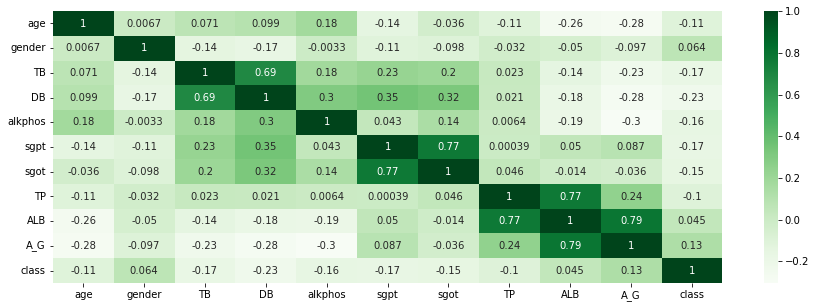

In [4]:
#Visualization of Correlations
fig = plt.figure(figsize=(15,5))
sns.heatmap(df.corr(),annot=True,cmap="Greens")

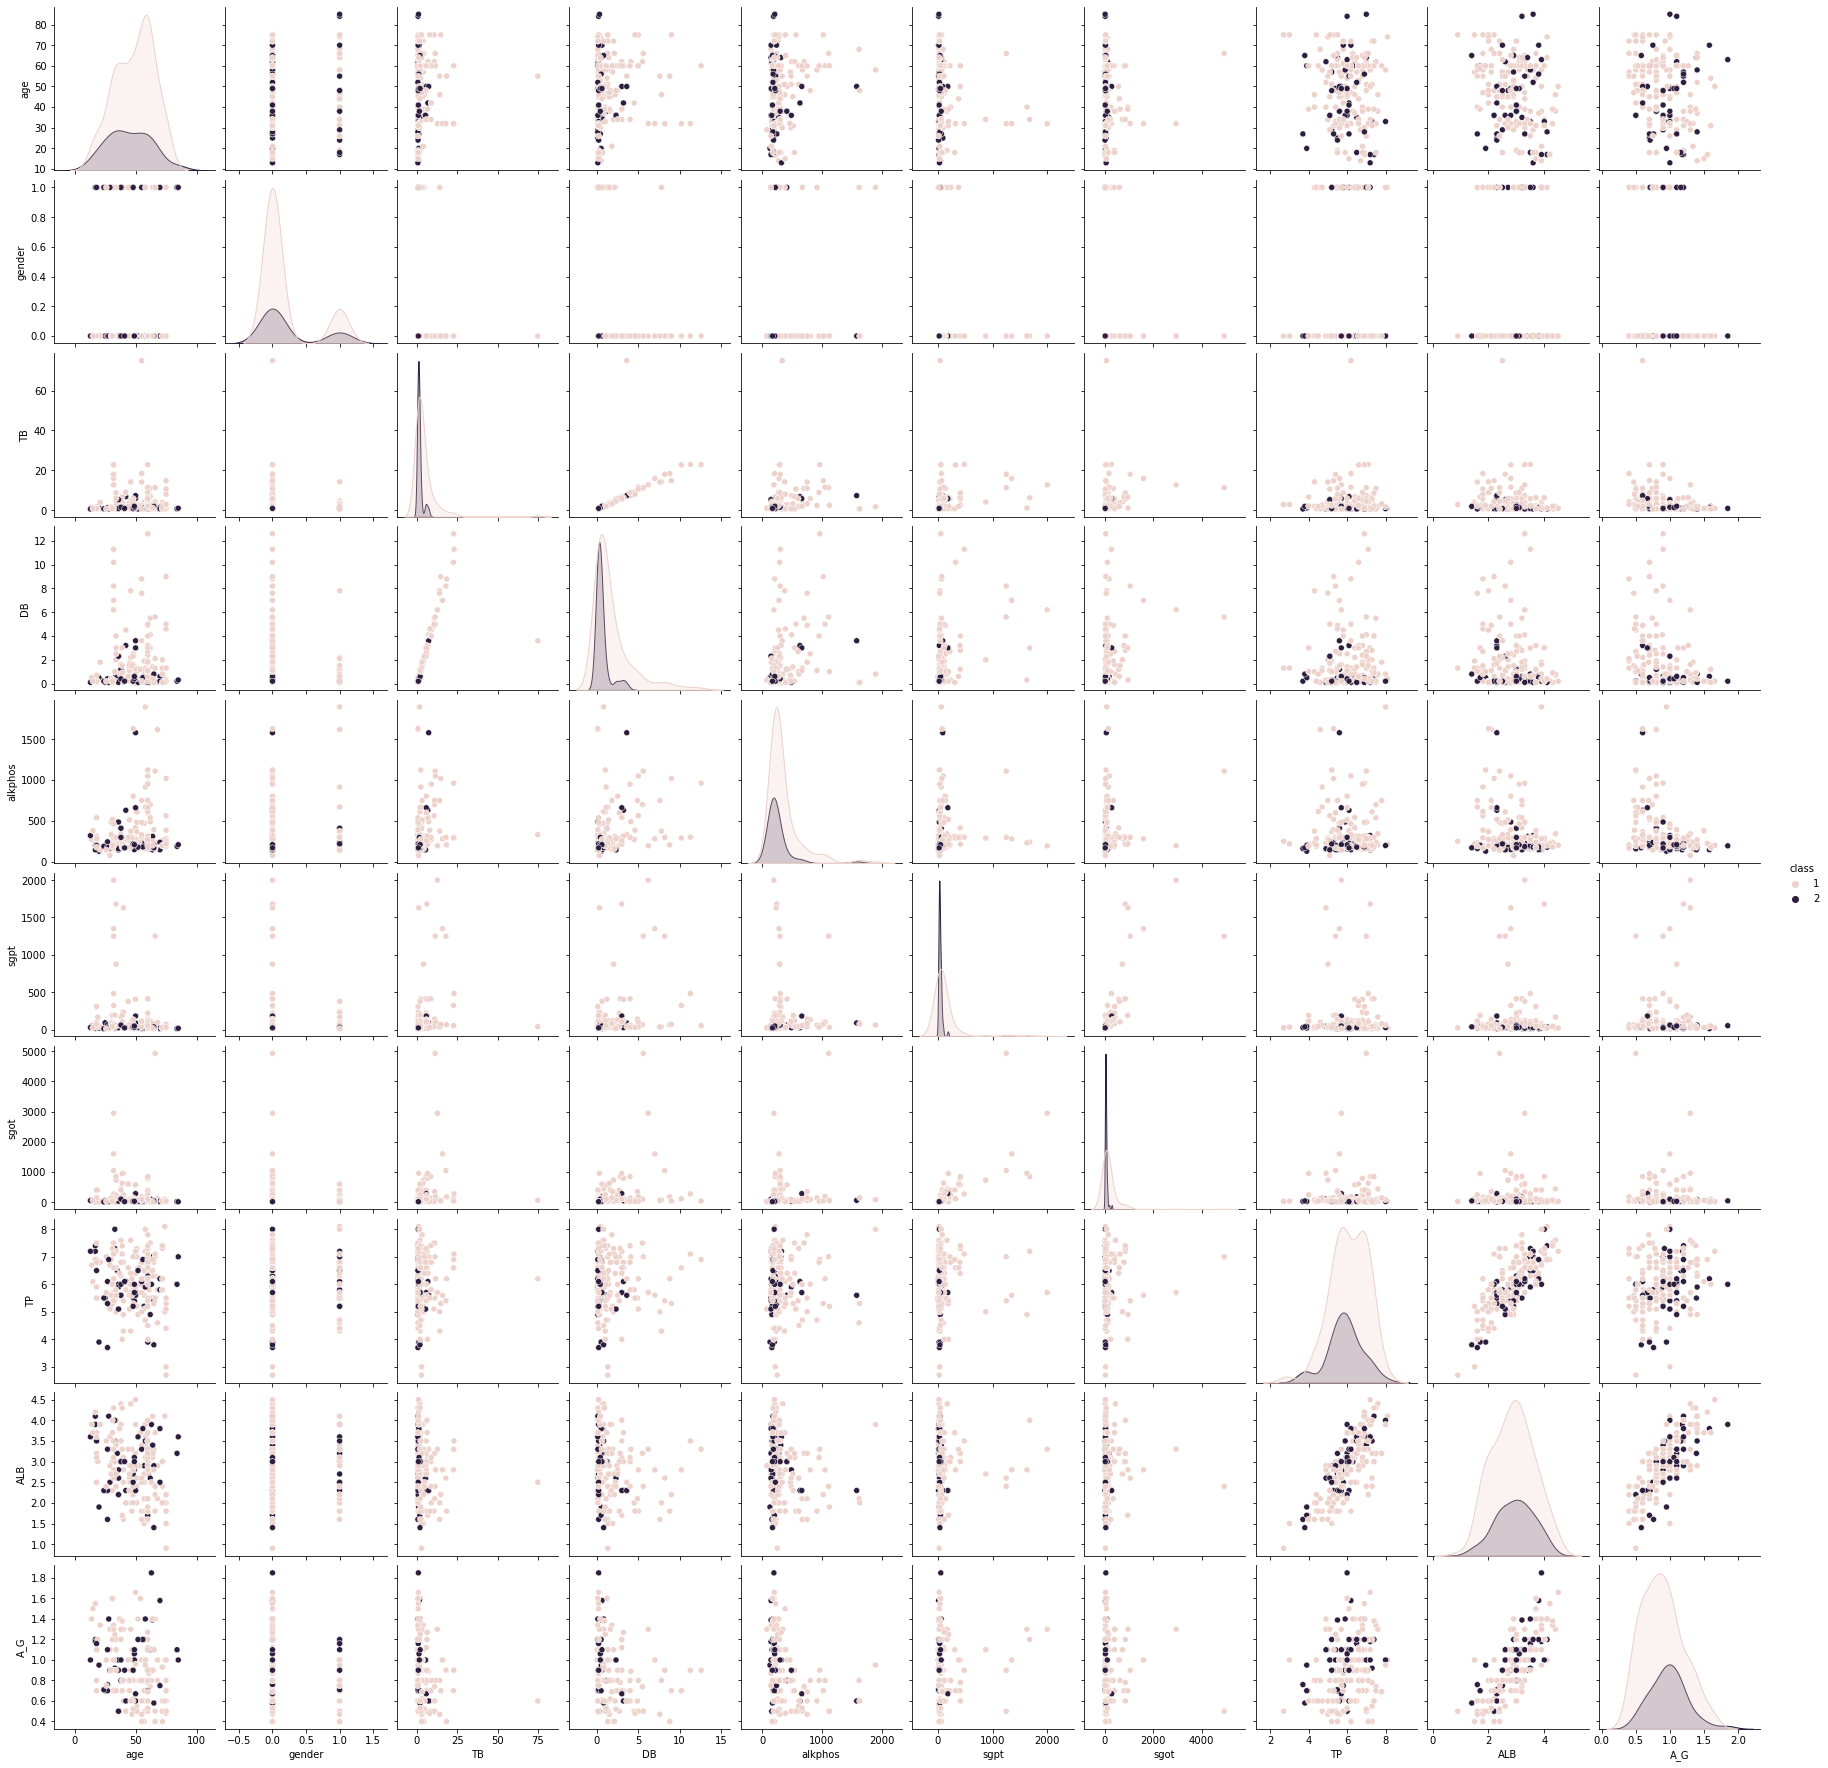

In [5]:
# Pairplot with hue=class
sns.pairplot(df, hue ='class')

In [6]:
#Identify number of liver class
df["class"].unique()

array([1, 2], dtype=int64)

In [7]:
#Create x and y variables
x=df.drop('class', axis=1).to_numpy()
y=df['class'].to_numpy()

#Create Training and Test Datasets
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test = train_test_split(x, y, stratify=y,test_size=0.2,random_state=100)

#Scale the Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train2 = sc.fit_transform(x_train)
x_test2 = sc.transform(x_test)

In [11]:
#Script for NB and Logistical Regression
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

#Evaluation Report and Matrix
from sklearn.metrics import classification_report, confusion_matrix  

for name,method in [('Logistic Regression', LogisticRegression(random_state=100)),
                    ('Naive Bayes',GaussianNB())]:
                    
    method.fit(x_train2,y_train)
    predict = method.predict(x_test2)
    
    
    target_names=['1','2']
    print('\nEstimator: {}'.format(name)) 
    print(confusion_matrix(y_test,predict))  
    print(classification_report(y_test,predict,target_names=target_names))  


Estimator: Logistic Regression
[[28  2]
 [ 9  1]]
              precision    recall  f1-score   support

           1       0.76      0.93      0.84        30
           2       0.33      0.10      0.15        10

    accuracy                           0.73        40
   macro avg       0.55      0.52      0.49        40
weighted avg       0.65      0.72      0.67        40


Estimator: Naive Bayes
[[ 6 24]
 [ 0 10]]
              precision    recall  f1-score   support

           1       1.00      0.20      0.33        30
           2       0.29      1.00      0.45        10

    accuracy                           0.40        40
   macro avg       0.65      0.60      0.39        40
weighted avg       0.82      0.40      0.36        40



In [9]:
#Script for Neural Network
from sklearn.neural_network import MLPClassifier  

mlp = MLPClassifier(hidden_layer_sizes=(10,5,2),
                    activation='relu',solver='adam',
                    max_iter=10000,random_state=100)
mlp.fit(x_train2, y_train) 
predictions = mlp.predict(x_test2) 

target_names=['1','2']
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions,target_names=target_names)) 

[[24  6]
 [ 4  6]]
              precision    recall  f1-score   support

           1       0.86      0.80      0.83        30
           2       0.50      0.60      0.55        10

    accuracy                           0.75        40
   macro avg       0.68      0.70      0.69        40
weighted avg       0.77      0.75      0.76        40

